In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_max, x_min , y_max, y_min = 6,-2, 4, -1
x = np.linspace(x_min,x_max,20)
y = np.linspace(y_min,y_max,20)


slope 1: 0.75 slope2: 0.5
slope 1: 1.0 slope2: 0.25


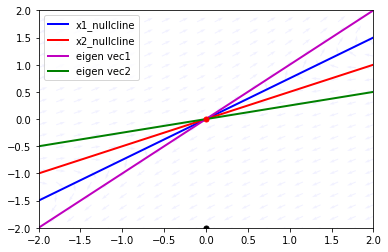

In [103]:
#null clines:
def drawLine (slope, label, color = 'r-', lw = 2):
    plt.plot (x,x*slope , color, label = label, lw = lw)

def plotNullClines (A):
    
    slope1 = -A[0,0] / A[0,1]
    slope2 = -A[1,0] / A[1,1]
    print ("slope 1:" , slope1 , "slope2:", slope2)
    
    drawLine(slope1, label = 'x1_nullcline' , color = 'b-')
    drawLine(slope2, label = 'x2_nullcline', color = 'r-')

    
def plotEigenVectors (e1 , e2):
    
    slope1 = e1[1]/e1[0]
    slope2 = e2[1]/e2[0]
    print ("slope 1:" , slope1 , "slope2:", slope2)
    
    drawLine(slope1, label = 'eigen vec1' , color = 'm-')
    drawLine(slope2, label = 'eigen vec2', color = 'g-')    

def getGrads (A, Xs, Ys):
    out = np.zeros ([len (x), len(y), 2])
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j] = A @ np.array ([x[i] , y[j]])
            
    return out #np.array ([[A @ np.array ([Xs[i,j] , Ys[i,j]]) for j in range (len (x))] for i in range (len (y))])



plt.figure()
plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])
A = np.array ([[-3, 4], [-1, 2]])
plotNullClines(A)


plotEigenVectors([1, 1], [4, 1])


X1 , Y1  = np.meshgrid(x, y)
out = getGrads(A, X1 , Y1)
DY1, DX1 = out[:,:,1].T, out[:,:,0].T
M = np.hypot (DX1, DY1)
M[M==0] = 1
M = M

DY1, DX1 = DY1/M  , DX1/M
# plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = '#f1f1ff')

#simulate 
r = np.array ([0, -2])
dt = 1e-1

plt.plot(r[0],r[1],"black", marker = "o", markersize = 5.0)

duration = 100
for i in range (duration):
    new_r = (A @ r.T * dt).T + r 
    hw = 0.03
    hl = 0.04
    if i % (duration//20) == 0:
        hw = 0.5
        hl = 0.8
        
    plt.arrow(r[0] , r[1], new_r[0] - r[0] , new_r[1] - r[1] , color = "#000550", head_width=hw, head_length=hl)
    r = new_r

    
plt.plot([0],[0],"red", marker = "o", markersize = 5.0)
    
plt.legend()

(20, 20)


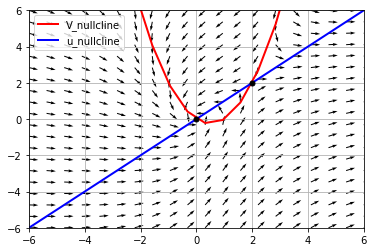

In [38]:
#Q4A

plt.figure()

plt.plot (x,x**2-x , 'r', label = 'V_nullcline', lw = 2)
plt.plot (x,x , 'b', label = 'u_nullcline', lw = 2)


def getGrad (x0,y0):
    return -x0+x0**2-y0, x0-y0

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    
#plot fixed points
plt.plot([0],[0],"black", marker = "o", markersize = 5.0)
plt.plot([2],[2],"black", marker = "o", markersize = 5.0)

plt.grid()


plt.legend()

(20, 20)


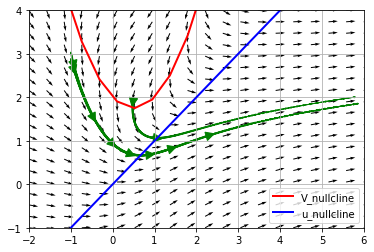

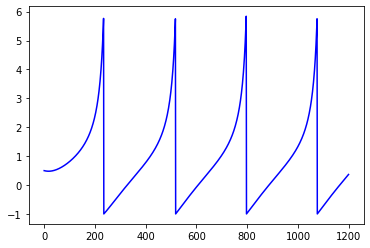

In [35]:
#Q4A

plt.figure()

plt.plot (x,x**2-x +2 , 'r', label = 'V_nullcline', lw = 2)
plt.plot (x,x , 'b', label = 'u_nullcline', lw = 2)


def getGrad (x0,y0):
    return -x0+x0**2-y0 +2 , x0-y0

def getGrads (X1,Y1):
    
    out = np.zeros ([len (x), len(y), 2])
#     print (out.shape)
    for i in range (len (x)):
        for j in range (len (y)):
            out[i,j, 0] , out[i,j, 1] = getGrad(X1[i,j] , Y1[i,j])
            
    return out




plt.xlim ([x_min , x_max])
plt.ylim ([y_min , y_max])


X1 , Y1  = np.meshgrid(x, y, indexing= 'ij')
out = getGrads(X1,Y1)
DX1, DY1 = out[:,:,0], out[:,:,1]
print (DX1.shape)
M = np.hypot (DX1, DY1)
# M[M==0] = 1
DY1, DX1 = DY1/M  , DX1/M

plt.quiver(X1, Y1, DX1, DY1, pivot='tail', color = 'black')
    
#plot fixed points
# plt.plot([0],[0],"black", marker = "o", markersize = 5.0)
# plt.plot([2],[2],"black", marker = "o", markersize = 5.0)

plt.grid()

dt = 0.01
r = np.array ([0.5,2])
duration = 1200
rs = []
for i in range (duration):
    new_r = np.array (getGrad(r[0] , r[1]))*dt + r 
    hw = 0.03
    hl = 0.04
    if i % (duration//10) == 0:
        hw = 0.2
        hl = 0.2
    if (new_r[0] < 6):
        plt.arrow(r[0] , r[1], new_r[0] - r[0] , new_r[1] - r[1] , color = "g", head_width=hw, head_length=hl)
    else:
        new_r[0] = -1
        new_r[1] = new_r[1] + 1
    r = new_r
    rs.append (r[0])

plt.legend()
plt.figure()
plt.plot (rs , color = "b")

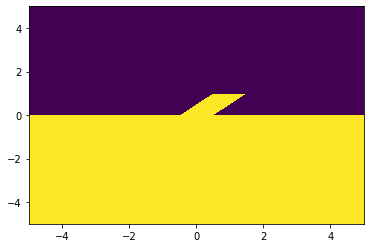

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def g(x):
    if x >= 0:
        return 1
    else:
        return 0
d = 1000
x1 = np.linspace(-5,5,d)
x2 = np.linspace(-5,5,d)

X1 , X2  = np.meshgrid(x1, x2)
Y = np.zeros_like (X1)
Z = np.zeros_like (X1)
for i in range (0,d):
    for j in range (0,d):
        x1 = X1 [i,j]
        x2 = X2 [i,j]
        
        z1 = g(-2*x1 + 2 * x2 + 1)
        z2 = g(-2*x2 + 2 * x1 + 1)
        y = g (2 * z1 + 2 * z2 - 3)
        Y[i,j] = y
        Z[i,j] = g(-x2 + y)
plt.pcolormesh(X1, X2, Z)
plt.show()

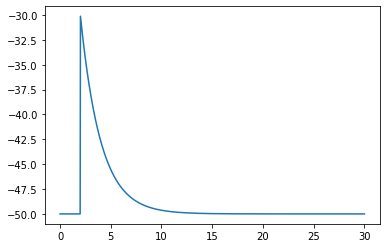

In [13]:
t = np.linspace (0,30,1000)
plt.figure()
v0 = -50
tm = 2
v = 20 * np.exp (-(t-2)/tm) + v0
v[t<2] = v0
plt.plot (t,v , label = 'tau_m = ' + str (tm))
# plt.legend()
plt.show()

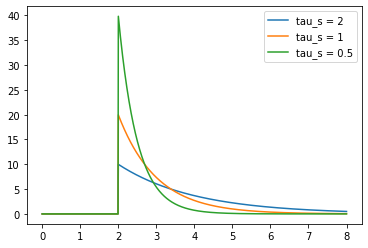

In [24]:
t = np.linspace (0,8,1000)
plt.figure()

for ts in [2,1,0.5]:

    I = 20/ts * np.exp (-(t-2)/ts)
    I[t<2] = 0
    plt.plot (t,I , label = 'tau_s = ' + str (ts))
plt.legend()
plt.show()